In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

In [8]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [9]:
df.shape

(103904, 24)

In [10]:
#Filling in NA values for Arrival Delay in Minutes to the mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [11]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
df['satisfaction'] = df['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})

In [13]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [14]:
df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

# EDA/Visualizations

In [15]:
sns.pairplot(data = df,
             x_vars = ['Age', 'Flight Distance', 'Inflight wifi service', 
                        'Departure/Arrival time convenient', 'Ease of Online booking',
                        'Gate location', 'Food and drink', 'Online boarding', 
                        'Seat comfort', 'Inflight entertainment', 'On-board service',
                        'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
            y_vars = ['Age', 'Flight Distance', 'Inflight wifi service', 
                        'Departure/Arrival time convenient', 'Ease of Online booking',
                        'Gate location', 'Food and drink', 'Online boarding', 
                        'Seat comfort', 'Inflight entertainment', 'On-board service',
                        'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
             hue = 'satisfaction'
);

/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x128b37380> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x12d2ae660> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

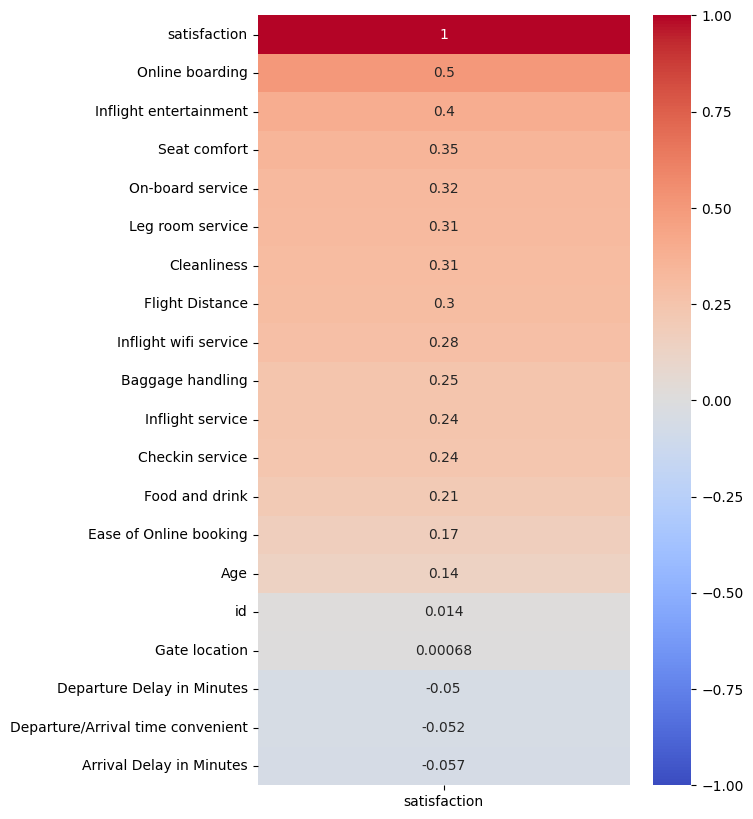

In [16]:
plt.figure(figsize = (6, 10))
sns.heatmap(df.corr(numeric_only = True)[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [17]:
df['satisfaction'].value_counts(normalize = True)

satisfaction
0    0.566667
1    0.433333
Name: proportion, dtype: float64

> Baseline model should perform better than 56.67% at detecting neutral or dissatisfied airline passengers and better than 43.4% for detecting satisfied airline passengers.

In [19]:
df.to_csv('data/df.csv', index = False)

In [20]:
features = ['Age', 'Flight Distance', 'Inflight wifi service', 
                        'Departure/Arrival time convenient', 'Ease of Online booking',
                        'Gate location', 'Food and drink', 'Online boarding', 
                        'Seat comfort', 'Inflight entertainment', 'On-board service',
                        'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X = df[features]
y = df['satisfaction']

In [21]:
df.describe()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_train_sc, y_train)

0.9395980905451186

In [27]:
knn.score(X_test, y_test)

/Users/yam/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.46015552817985833

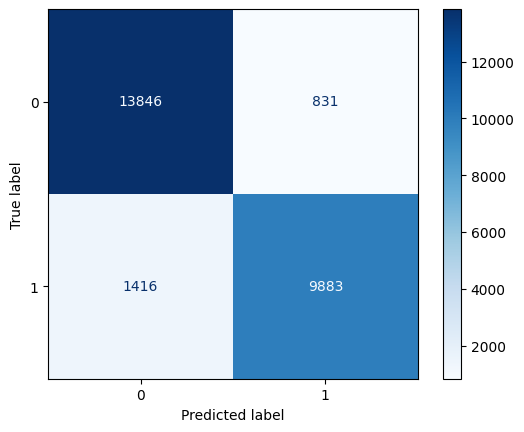

In [28]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [34]:
scores = []

for k in range(1,32, 2):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1) 
    knn.fit(X_train_sc, y_train)
    acc_train = knn.score(X_train_sc, y_train)
    acc_test = knn.score(X_test_sc, y_test)
    scores.append({'k' : k, 'Training Accuracy' :acc_train, 'Test Accuracy' : acc_test})

In [35]:
df_score = pd.DataFrame(scores)
df_score

,k,Training Accuracy,Test Accuracy
0,1,1.000000,0.899754
1,3,0.951468,0.912227
2,5,0.939598,0.913497
3,7,0.933695,0.914190
4,9,0.929435,0.915114
5,11,0.926779,0.915191
6,13,0.924161,0.915037
7,15,0.921350,0.913459
8,17,0.920683,0.912612
9,19,0.919413,0.911726


/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

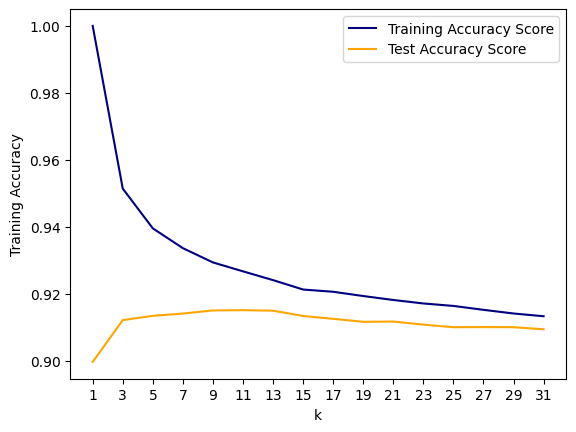

In [36]:
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Training Accuracy',
             c = 'navy',
             label = 'Training Accuracy Score') 

sns.lineplot(data = df_score,
             x = 'k',
             y = 'Test Accuracy',
             c = 'orange',
label = 'Test Accuracy Score')
plt.xticks(range(1,32,2));

In [50]:
# Instantiate (again) & Refit (again)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_sc, y_train)


KNeighborsClassifier(n_neighbors=1)

In [51]:
# New training score
knn.score(X_train_sc, y_train)

1.0

In [52]:
# New testing score
knn.score(X_test_sc, y_test)

0.899753618724977

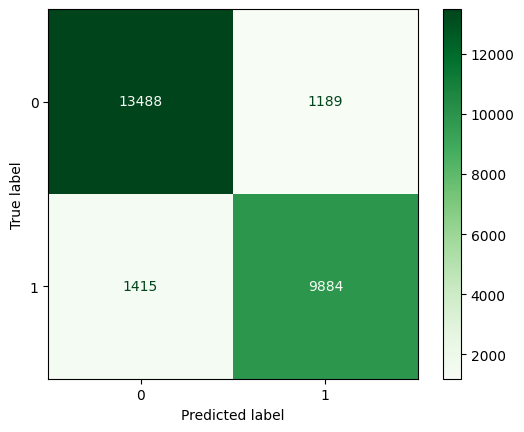

In [53]:
# New Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Greens');

In [54]:
from sklearn.linear_model import LogisticRegression

In [64]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [65]:
logr.score(X_train_sc, y_train)

0.828251719535982

In [66]:
logr.score(X_test_sc, y_test)

0.8281875577456114

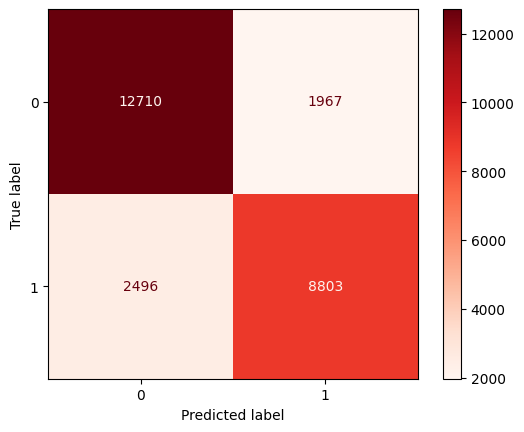

In [58]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [61]:
rf.score(X_train_sc, y_train)

0.9999871676419259

In [62]:
rf.score(X_test_sc, y_test)

0.9486834000615953

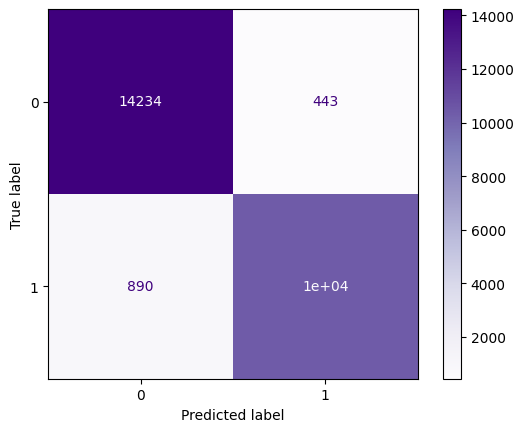

In [63]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');